In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Figure 4A

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was pro

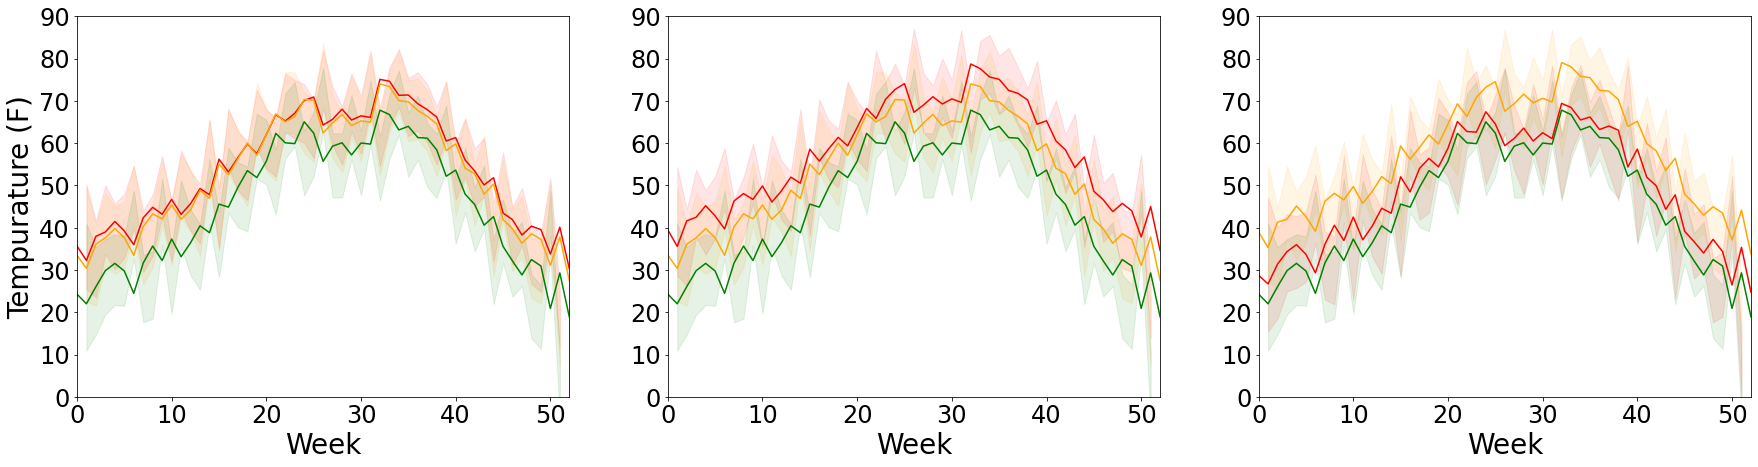

In [ ]:
tempdata2015 = pd.read_csv("/covid19-project/final file/data/NY_Temp_2015.csv") 
tempdata2015.fillna(np.nan, inplace=True)
tempdata2016 = pd.read_csv("/covid19-project/final file/data/NY_Temp_2016.csv")
tempdata2016.fillna(np.nan, inplace=True)
tempdata2017 = pd.read_csv("/covid19-project/final file/data/NY_Temp_2017.csv")
tempdata2017.fillna(np.nan, inplace=True)
tempdata2018 = pd.read_csv("/covid19-project/final file/data/NY_Temp_2018.csv") 
tempdata2018.fillna(np.nan, inplace=True)
tempdata2019 = pd.read_csv("/covid19-project/final file/data/NY_Temp_2019.csv") 
tempdata2019.fillna(np.nan, inplace=True)

# Infection
# Cluster 1: Queens, Bronx Rockland, Westchester.
# Cluster 2: Putnam, Dutchess, Manhattan, Brooklyn.
# Cluster 3: Hamilton, Essex, Franklin and St.Lawrence.

infection = {}
infection['countiescaseclust1'] = ['Nassau', 'Bronx', 'Westchester']
infection['countiescaseclust2'] = ['Queens', 'Orange']
infection['countiescaseclust3'] = ['Essex', 'Hamilton']
infection['cluster'] = 'CaseCluster'

# Death / Infection
# Steuben, Tioga, Yates, Orleans
# Brooklyn, Manhattan, Bronx, Queens
# Franklin, St. Lawrence, Hamilton, Essex

faltaliry = {}
faltaliry['countiescaseclust1'] = ['Steuben']
faltaliry['countiescaseclust2'] = ['Queens', 'Bronx']
faltaliry['countiescaseclust3'] = ['Essex', 'Hamilton']
faltaliry['cluster'] = 'PosDeathCluster'

# Death

death = {}
death['countiescaseclust1'] = ['Bronx', 'Queens']
death['countiescaseclust2'] = ['Nassau', 'Richmond', 'Orange']
death['countiescaseclust3'] = ['Essex', 'Hamilton']
death['cluster'] = 'DeathCluster'

red = (round(254/255,2),0,0,1)
orange = (round(254/255,2),round(165/255,2),0,1)
green = (0,round(128/255,2),round(1/255,2),1)

groups = [infection, death, faltaliry]

j = 0
subplots = [131, 132, 133]
plt.figure(figsize=(30,7))
ax = [plt.subplot(subplots[0]), plt.subplot(subplots[1]), plt.subplot(subplots[2])]

for group in groups: 
  plotdata = pd.DataFrame()
  plotdata['Week'] = range(1, 54)

  sumdata = pd.DataFrame()
  sumdata['Week'] = range(1, 54)

  countiesallclust = [group['countiescaseclust1'], group['countiescaseclust2'], group['countiescaseclust3']]
  i = 1

  for counties in countiesallclust:
    for county in counties:

      cols2015 = []
      t = tempdata2015[tempdata2015['county'] == county].copy()
      t['date_local'] = pd.to_datetime(t['date_local'])
      t = t.groupby('date_local').mean().resample('W-MON').mean()
      t['Week'] = range(1, len(t['sample_measurement'].tolist()) + 1)
      sumdata[county + '_Temp2015'] = [np.nan] * 53
      sumdata.loc[0:len(t['sample_measurement'].tolist())-1, county + '_Temp2015'] = t['sample_measurement'].tolist()
      cols2015.append(county + '_Temp2015')
      sumdata['Average_Temp2015'] = sumdata[cols2015].mean(axis=1)

      
      cols2016 = []
      t = tempdata2016[tempdata2016['county'] == county].copy()
      t['date_local'] = pd.to_datetime(t['date_local'])
      t = t.groupby('date_local').mean().resample('W-MON').mean()
      t['Week'] = range(1, len(t['sample_measurement'].tolist()) + 1)
      sumdata[county + '_Temp2016'] = [np.nan] * 53
      sumdata.loc[0:len(t['sample_measurement'].tolist())-1, county + '_Temp2016'] = t['sample_measurement'].tolist()
      cols2016.append(county + '_Temp2016')
      sumdata['Average_Temp2016'] = sumdata[cols2016].mean(axis=1)

      
      cols2017 = []
      t = tempdata2017[tempdata2017['county'] == county].copy()
      t['date_local'] = pd.to_datetime(t['date_local'])
      t = t.groupby('date_local').mean().resample('W-MON').mean()
      t['Week'] = range(1, len(t['sample_measurement'].tolist()) + 1)
      sumdata[county + '_Temp2017'] = [np.nan] * 53
      sumdata.loc[0:len(t['sample_measurement'].tolist())-1, county + '_Temp2017'] = t['sample_measurement'].tolist()
      cols2017.append(county + '_Temp2017')
      sumdata['Average_Temp2017'] = sumdata[cols2017].mean(axis=1)

      
      cols2018 = []
      t = tempdata2018[tempdata2018['county'] == county].copy()
      t['date_local'] = pd.to_datetime(t['date_local'])
      t = t.groupby('date_local').mean().resample('W-MON').mean()
      t['Week'] = range(1, len(t['sample_measurement'].tolist()) + 1)
      sumdata[county + '_Temp2018'] = [np.nan] * 53
      sumdata.loc[0:len(t['sample_measurement'].tolist())-1, county + '_Temp2018'] = t['sample_measurement'].tolist()
      cols2018.append(county + '_Temp2018')
      sumdata['Average_Temp2018'] = sumdata[cols2018].mean(axis=1)
      
      cols2019 = []
      t = tempdata2019[tempdata2019['county'] == county].copy()
      t['date_local'] = pd.to_datetime(t['date_local'])
      t = t.groupby('date_local').mean().resample('W-MON').mean()
      t['Week'] = range(1, len(t['sample_measurement'].tolist()) + 1)
      sumdata[county + '_Temp2019'] = [np.nan] * 53
      sumdata.loc[0:len(t['sample_measurement'].tolist())-1, county + '_Temp2019'] = t['sample_measurement'].tolist()
      cols2019.append(county + '_Temp2019')
      sumdata['Average_Temp2019'] = sumdata[cols2019].mean(axis=1)

      sumdata.to_csv('tempweeklyClaster1.csv')
      avercols = [col for col in sumdata if col.startswith('Average_')]
      plotdata['Average_Cluster' + str(i)] = sumdata[avercols].mean(axis=1)

    i += 1

  if group['cluster'] != 'PosDeathCluster':
    
    shifted_avg1 = plotdata['Average_Cluster1'].diff(1)
    shifted_avg1.dropna(inplace=True)
    shifted_avg = shifted_avg1.diff(1)
    shifted_avg.dropna(inplace=True)
    
    model = SARIMAX(shifted_avg, order=(1,0,2), trend='c')
    results1 = model.fit()

    shifted_avg1 = plotdata['Average_Cluster2'].diff(1)
    shifted_avg1.dropna(inplace=True)
    shifted_avg = shifted_avg1.diff(1)
    shifted_avg.dropna(inplace=True)

    model = SARIMAX(shifted_avg, order=(0,0,3), trend='c')
    results2 = model.fit()

    shifted_avg1 = plotdata['Average_Cluster3'].diff(1)
    shifted_avg1.dropna(inplace=True)
    shifted_avg = shifted_avg1.diff(1)
    shifted_avg.dropna(inplace=True)

    model = SARIMAX(shifted_avg, order=(0,0,3), trend='c')
    results3 = model.fit()

  else:
    
    shifted_avg1 = plotdata['Average_Cluster1'].diff(1)
    shifted_avg1.dropna(inplace=True)
    shifted_avg = shifted_avg1.diff(1)
    shifted_avg.dropna(inplace=True)
    
    model = SARIMAX(shifted_avg, order=(0,0,3), trend='c')
    results1 = model.fit()

    shifted_avg1 = plotdata['Average_Cluster2'].diff(1)
    shifted_avg1.dropna(inplace=True)
    shifted_avg = shifted_avg1.diff(1)
    shifted_avg.dropna(inplace=True)

    model = SARIMAX(shifted_avg, order=(1,0,2), trend='c')
    results2 = model.fit()

    shifted_avg1 = plotdata['Average_Cluster3'].diff(1)
    shifted_avg1.dropna(inplace=True)
    shifted_avg = shifted_avg1.diff(1)
    shifted_avg.dropna(inplace=True)

    model = SARIMAX(shifted_avg, order=(0,0,3), trend='c')
    results3 = model.fit()


  ax[j].plot(plotdata['Average_Cluster1'], color=red)
  ax[j].plot(plotdata['Average_Cluster2'], color=orange)
  ax[j].plot(plotdata['Average_Cluster3'], color=green)

  ax[j].fill_between(range(1,52), 
                    plotdata['Average_Cluster1'].tolist()[2:] + results1.get_prediction(start=-51).conf_int()['lower Average_Cluster1'], 
                    plotdata['Average_Cluster1'].tolist()[2:] + results1.get_prediction(start=-51).conf_int()['upper Average_Cluster1'], 
                    color=red, 
                    alpha=0.1)
  ax[j].fill_between(range(1,52), 
                    plotdata['Average_Cluster2'].tolist()[2:] + results2.get_prediction(start=-51).conf_int()['lower Average_Cluster2'], 
                    plotdata['Average_Cluster2'].tolist()[2:] + results2.get_prediction(start=-51).conf_int()['upper Average_Cluster2'], 
                    color=orange, 
                    alpha=0.1)
  ax[j].fill_between(range(1,52), 
                    plotdata['Average_Cluster3'].tolist()[2:] + results3.get_prediction(start=-51).conf_int()['lower Average_Cluster3'], 
                    plotdata['Average_Cluster3'].tolist()[2:] + results3.get_prediction(start=-51).conf_int()['upper Average_Cluster3'], 
                    color=green, 
                    alpha=0.1)
  ax[j].set_ylim(0,90)
  ax[j].set_xlim(0,52)
  ax[j].tick_params(axis='both', which='major', labelsize=24)
  ax[j].set_xticks(np.arange(0, 52, step=10))
  ax[j].set_yticks(np.arange(0, 91, step=10))
  ax[j].set_xlabel('Week', fontsize=28)
  if j == 0:
    ax[j].set_ylabel('Tempurature (F)', fontsize=28)
  j += 1

#### Figure 4B

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was pro

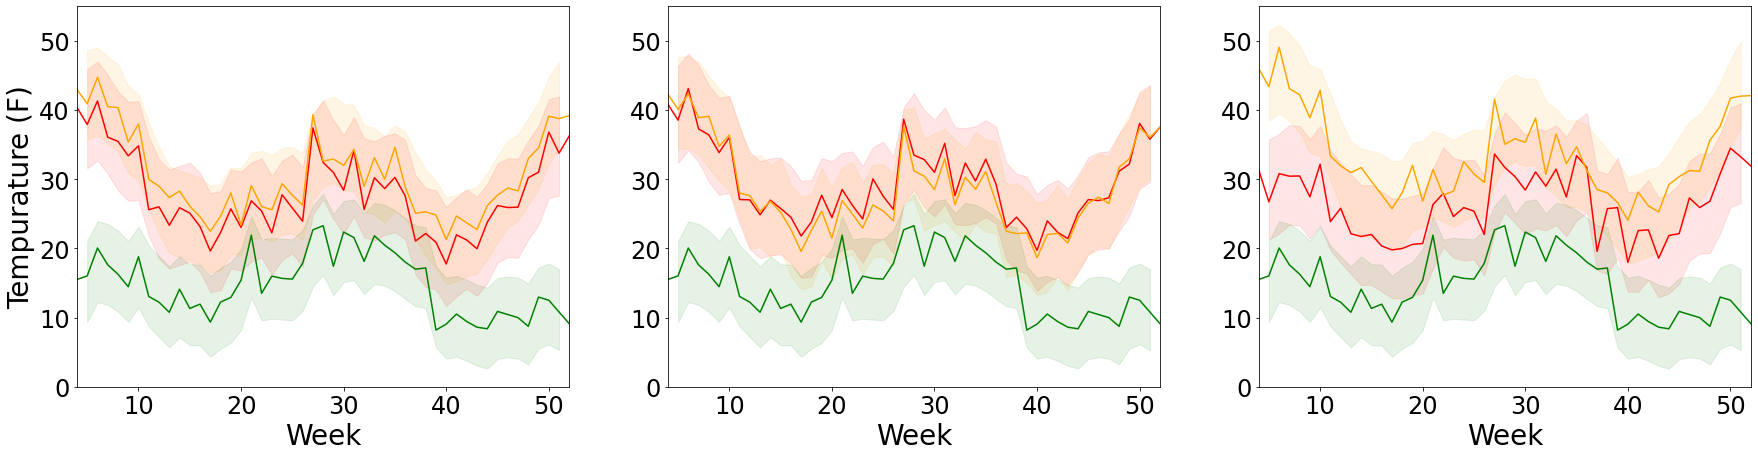

In [ ]:
red = (round(254/255,2),0,0,1)
orange = (round(254/255,2),round(165/255,2),0,1)
green = (0,round(128/255,2),round(1/255,2),1)

j = 0
subplots = [131, 132, 133]
plt.figure(figsize=(30,7))
ax = [plt.subplot(subplots[0]), plt.subplot(subplots[1]), plt.subplot(subplots[2])]
groups = ['infection', 'death', 'deathinfect']

for group in groups: 

  pm25dataclust1 = pd.read_csv("/covid19-project/final file/data/cluster1/" + group +  "/PM2.5_2015_2020.csv")
  pm25dataclust2 = pd.read_csv("/covid19-project/final file/data/cluster2/" + group +  "/PM2.5_2015_2020.csv")
  pm25dataclust3 = pd.read_csv("/covid19-project/final file/data/cluster3/PM2.5_2015_2020.csv")

  plotdata = pd.DataFrame() 
  plotdata['Week'] = range(1, 53)
  plotdata.set_index('Week', inplace=True)
  plotdata['Average_Cluster1'] = pm25dataclust1.groupby('Week').mean()['Average']
  plotdata['Average_Cluster2'] = pm25dataclust2.groupby('Week').mean()['Average']
  plotdata['Average_Cluster3'] = pm25dataclust3.groupby('Week').mean()['Average']

  sumdata = pd.DataFrame()
  sumdata['Week'] = range(1, 54)

  model = SARIMAX(plotdata['Average_Cluster1'], order=(1,1,0), trend='c')  
  results1 = model.fit()

  model = SARIMAX(plotdata['Average_Cluster2'], order=(1,1,2), trend='c')
  results2 = model.fit()

  model = SARIMAX(plotdata['Average_Cluster3'], order=(0,1,1), trend='c')  
  results3 = model.fit()

  ax[j].plot(plotdata['Average_Cluster1'], color=red)
  ax[j].plot(plotdata['Average_Cluster2'], color=orange)
  ax[j].plot(plotdata['Average_Cluster3'], color=green)

  ax[j].fill_between(range(5,52), 
                    results1.get_prediction(start=-47).conf_int()['lower Average_Cluster1'], 
                    results1.get_prediction(start=-47).conf_int()['upper Average_Cluster1'], 
                    color=red, 
                    alpha=0.1)
  ax[j].fill_between(range(5,52), 
                    results2.get_prediction(start=-47).conf_int()['lower Average_Cluster2'], 
                    results2.get_prediction(start=-47).conf_int()['upper Average_Cluster2'], 
                    color=orange, 
                    alpha=0.1)
  ax[j].fill_between(range(5,52), 
                    results3.get_prediction(start=-47).conf_int()['lower Average_Cluster3'], 
                    results3.get_prediction(start=-47).conf_int()['upper Average_Cluster3'], 
                    color=green, 
                    alpha=0.1)
  ax[j].set_ylim(0,55)
  ax[j].set_xlim(4,52)
  ax[j].tick_params(axis='both', which='major', labelsize=24)
  ax[j].set_xticks(np.arange(10, 52, step=10))
  ax[j].set_yticks(np.arange(0, 51, step=10))
  ax[j].set_xlabel('Week', fontsize=28)
  if j == 0:
    ax[j].set_ylabel('Tempurature (F)', fontsize=28)
  j += 1